In [46]:
import os
from dotenv import load_dotenv
load_dotenv()

True

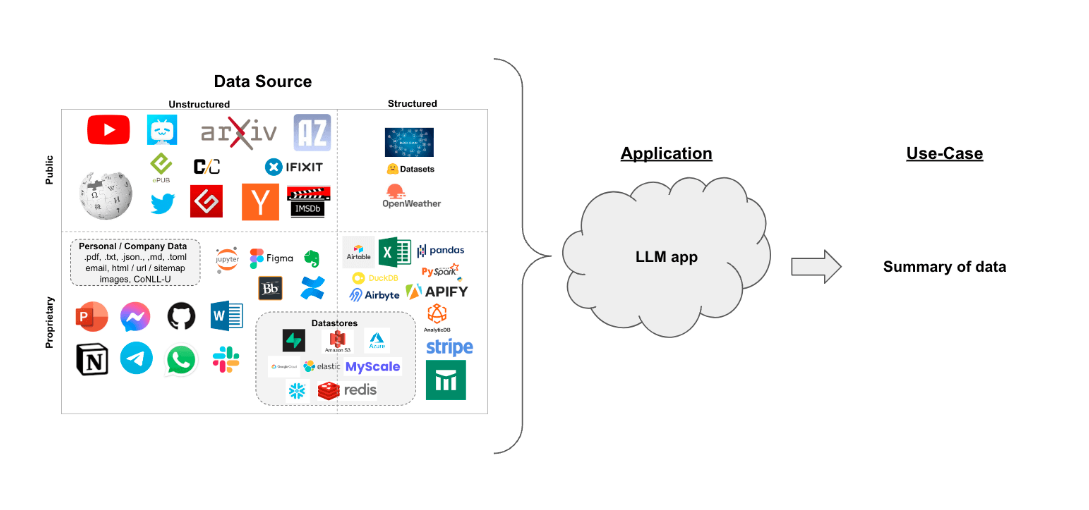

In [47]:
from langchain_groq import ChatGroq
api_key = os.getenv("GROQ_API_KEY")
llm = ChatGroq(groq_api_key=api_key, model="llama-3.3-70b-versatile")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000029E94E92620>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000029E94E932E0>, model_name='llama-3.3-70b-versatile', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [48]:
from langchain.schema import (
    AIMessage,
    HumanMessage,
    SystemMessage
)

In [49]:
Speech = """
🎤 Speech: “Follow Your Passion, Not the Pressure”

Good [morning/afternoon] everyone,

Today, I want to talk about something very close to all of us — education, pressure, and dreams.

We all know the story of 3 Idiots. It’s not just a movie; it’s a life lesson. It tells us that marks and competition are not everything. What really matters is passion, creativity, and happiness.

In the film, Rancho shows us that success comes naturally when you love what you do. He says, “Pursue excellence, and success will follow”. Not the other way around. Too often, we study because we are forced to, or because society expects us to, not because we truly enjoy learning.

Friends, we live in a world full of pressure — exams, expectations, rankings. But we must remember: chasing grades without understanding is like running on a treadmill going nowhere. We should chase knowledge, curiosity, and innovation.

Also, failure is not the end. Raju’s struggles, Farhan’s dilemmas, and Rancho’s courage teach us that failure is a stepping stone to finding our true path. And no matter what, we should always say with confidence: “All is well!”

So, my message to all of you is:

Follow your heart, not the herd.

Learn because you love to learn.

Don’t fear failure, embrace it as a teacher.

Remember, life is not about marks or medals; it’s about joy, curiosity, and doing what makes you proud.

Thank you.

"""

In [50]:
chat_message = [
    SystemMessage(content="You are an AI assistant specialized in summarizing speeches." 
    "Your task is to read a speech and provide a concise summary in 3-4 sentences." 
    "Focus on the main message, key points, and motivational essence of the speech."
    "Keep the summary clear and easy to understand."),

    HumanMessage(content=f"{Speech}")
]

In [51]:
llm.get_num_tokens(Speech)

366

In [52]:
# This is one way to summuraze the Speech
llm(chat_message).content

'The speaker emphasizes the importance of following one\'s passion and not giving in to societal pressure, using the movie "3 Idiots" as a life lesson. They encourage listeners to prioritize knowledge, curiosity, and innovation over mere grades and competition, and to view failure as a stepping stone to success. The key message is to stay true to oneself, learn with love, and embrace failure as a teacher, rather than chasing external validation. By doing so, individuals can lead a life filled with joy, curiosity, and a sense of pride in their pursuits.'

In [53]:
llm(chat_message)

AIMessage(content='The speaker emphasizes the importance of following one\'s passion and dreams, rather than succumbing to societal pressure and expectations. They use the movie "3 Idiots" as a life lesson, highlighting that success comes naturally when you love what you do, and that chasing knowledge and curiosity is more valuable than just grades. The speaker encourages the audience to embrace failure as a stepping stone to finding their true path and to prioritize joy, curiosity, and personal pride over external validation. By doing so, they urge everyone to "follow their heart, not the herd" and learn for the love of learning.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 120, 'prompt_tokens': 409, 'total_tokens': 529, 'completion_time': 0.392128895, 'prompt_time': 0.045215354, 'queue_time': 0.085550716, 'total_time': 0.437344249}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_2ddfbb0da0', 'service_tier': 'on_demand', 'finish_r

#  Prompt Template Text Summurization

In [54]:
from langchain.chains import LLMChain
from langchain import PromptTemplate

genric_template = """
Write a Summury of the following Speech:
Speech:{Speech},
Translate the precise summury to {language}
"""

prompt = PromptTemplate(
    input_variable=['Speech', 'language'],
    template=genric_template
)
prompt

PromptTemplate(input_variables=['Speech', 'language'], input_types={}, partial_variables={}, template='\nWrite a Summury of the following Speech:\nSpeech:{Speech},\nTranslate the precise summury to {language}\n')

In [55]:
complate_prommpt=prompt.format(Speech=Speech, language="French")
complate_prommpt

'\nWrite a Summury of the following Speech:\nSpeech:\n🎤 Speech: “Follow Your Passion, Not the Pressure”\n\nGood [morning/afternoon] everyone,\n\nToday, I want to talk about something very close to all of us — education, pressure, and dreams.\n\nWe all know the story of 3 Idiots. It’s not just a movie; it’s a life lesson. It tells us that marks and competition are not everything. What really matters is passion, creativity, and happiness.\n\nIn the film, Rancho shows us that success comes naturally when you love what you do. He says, “Pursue excellence, and success will follow”. Not the other way around. Too often, we study because we are forced to, or because society expects us to, not because we truly enjoy learning.\n\nFriends, we live in a world full of pressure — exams, expectations, rankings. But we must remember: chasing grades without understanding is like running on a treadmill going nowhere. We should chase knowledge, curiosity, and innovation.\n\nAlso, failure is not the end. 

In [56]:
llm.get_num_tokens(complate_prommpt)

393

In [61]:
llm_chain = LLMChain(llm=llm, prompt=prompt)
Summary= llm_chain.run({'Speech': Speech, 'language':'marathi'})
Summary

'**English Summary:**\n\nThe speech "Follow Your Passion, Not the Pressure" emphasizes the importance of pursuing one\'s passion and interests in education, rather than just following societal pressure and expectations. It uses the movie "3 Idiots" as an example to illustrate that success comes naturally when one loves what they do. The speech encourages students to chase knowledge, curiosity, and innovation, rather than just grades and marks. It also reminds them that failure is not the end, but a stepping stone to finding one\'s true path, and that life is about joy, curiosity, and doing what makes one proud.\n\n**Marathi Summary:**\n\n"दाबाचा पाठलाग करू नका, पण तुमच्या जीवाचा पाठलाग करा" या भाषणामध्ये, शिक्षणाच्या क्षेत्रात दाब आणि अपेक्षांच्या तुलनेत जिवाचा पाठलाग करण्याचे महत्त्व सांगितले आहे. हे भाषण तुमच्या आवडी आणि रुचींना अनुसरून शिक्षण घेण्याचे महत्त्व सांगते, जेणेकरून तुम्ही तुमच्या कामात यशस्वी होऊ शकाल. या भाषणात "३ इडियट्स" या चित्रपटाचा संदर्भ देत, तुम्ही जे काम करायचे त

## Two ways to summarize or otherwise combine documents.
- **Stuff**, which simply concatenates documents into a prompt;
- **Map-reduce**, for larger sets of documents. This splits documents into batches,
 summarizes those, and then summarizes the summaries.

#### 1) StuffDocumentChain text summarization: 
- Stuff, which simply concatenates documents into a prompt;
- The chain will take a list of documents, insert them all into a prompt, and pass that prompt to an LLM:

#### 2)  Map-Reduce text summarization:
- Let's unpack the map reduce approach. For this, we'll first map each document to an individual summary using an LLM. Then we'll reduce or consolidate those summaries into a single global summary.